# k-nearest neighbors

In [66]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

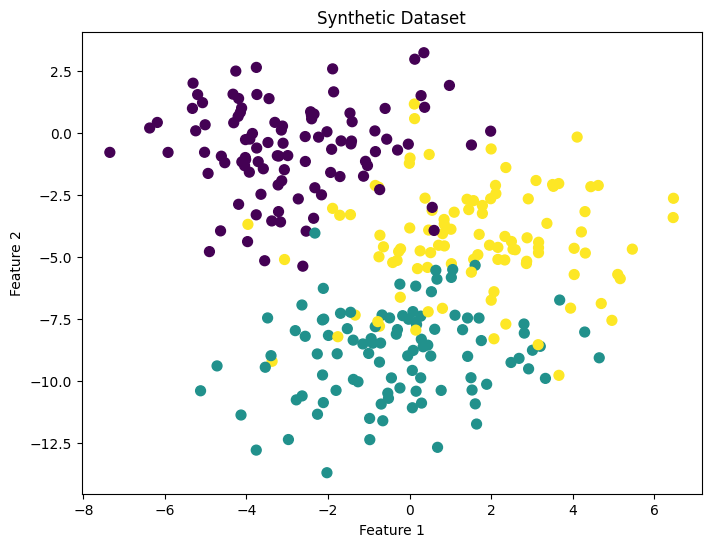

In [95]:
# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=3, n_features=2, random_state=58, cluster_std=2, shuffle=True)

# Plot the generated data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.title('Synthetic Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [96]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [97]:
# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [98]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

Accuracy: 0.88
Confusion Matrix:
[[22  0  2]
 [ 0 29  1]
 [ 2  6 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        24
           1       0.83      0.97      0.89        30
           2       0.90      0.78      0.84        36

    accuracy                           0.88        90
   macro avg       0.88      0.89      0.88        90
weighted avg       0.88      0.88      0.88        90



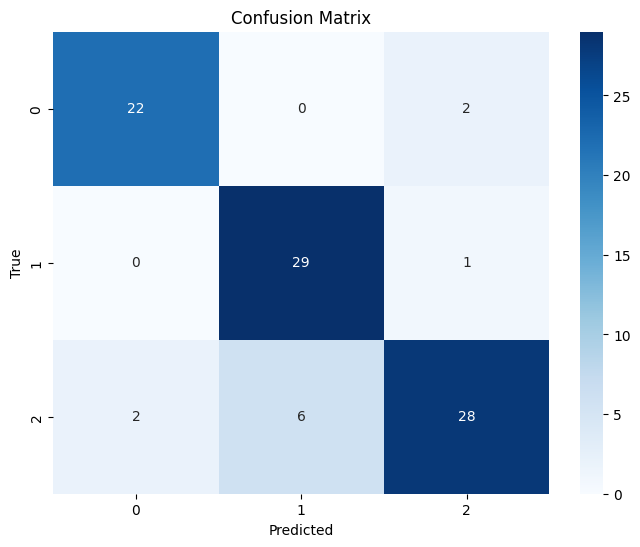

In [99]:
# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(cm)
print('Classification Report:')
print(report)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

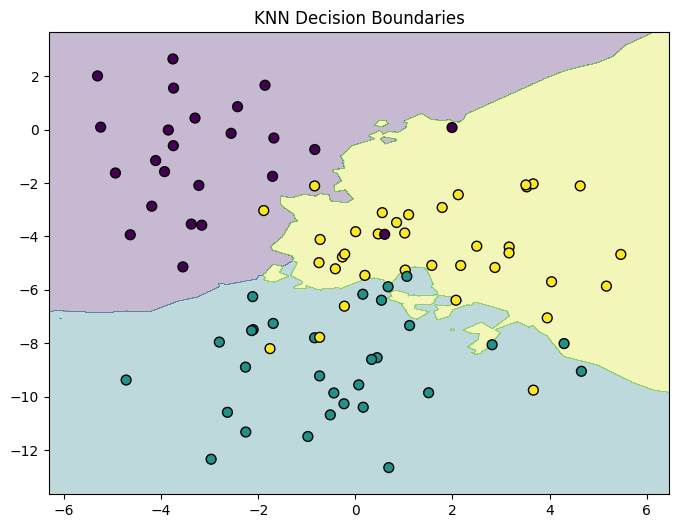

In [64]:
# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis', edgecolor='k')


# Plot decision boundaries
fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_boundaries(X_test, y_test, knn, ax)
ax.set_title('KNN Decision Boundaries')
plt.show()

# Parameter tuning

In [100]:
# Define the parameter grid
param_grid = {'n_neighbors': np.arange(1, 31)}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_

print(f'Best Parameters: {best_params}')


Best Parameters: {'n_neighbors': np.int64(13)}


In [101]:
y_pred = best_knn.predict(X_test)


Accuracy: 0.89
Confusion Matrix:
[[22  0  2]
 [ 0 28  2]
 [ 2  4 30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        24
           1       0.88      0.93      0.90        30
           2       0.88      0.83      0.86        36

    accuracy                           0.89        90
   macro avg       0.89      0.89      0.89        90
weighted avg       0.89      0.89      0.89        90



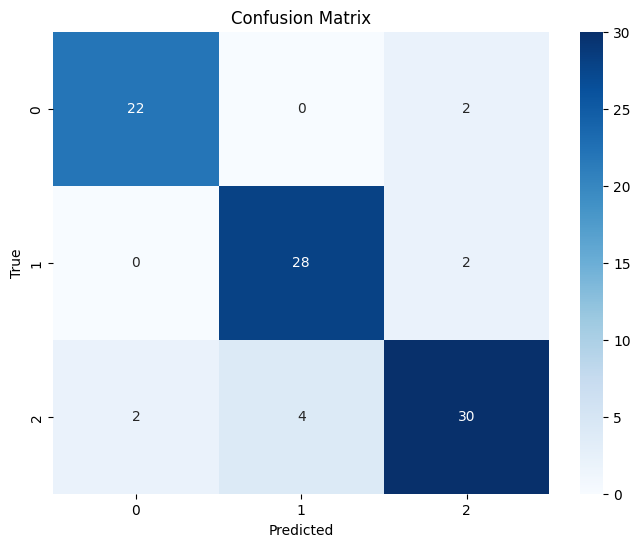

In [102]:
# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(cm)
print('Classification Report:')
print(report)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


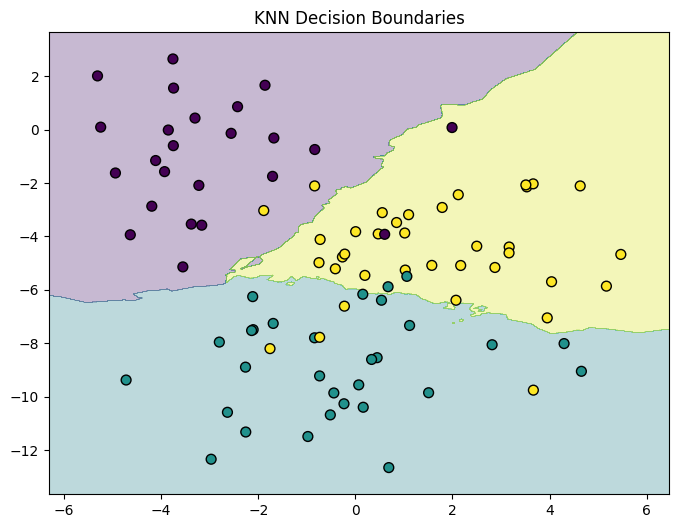

In [73]:
# Function to plot decision boundaries

# Plot decision boundaries
fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_boundaries(X_test, y_test, best_knn, ax)
ax.set_title('KNN Decision Boundaries')
plt.show()


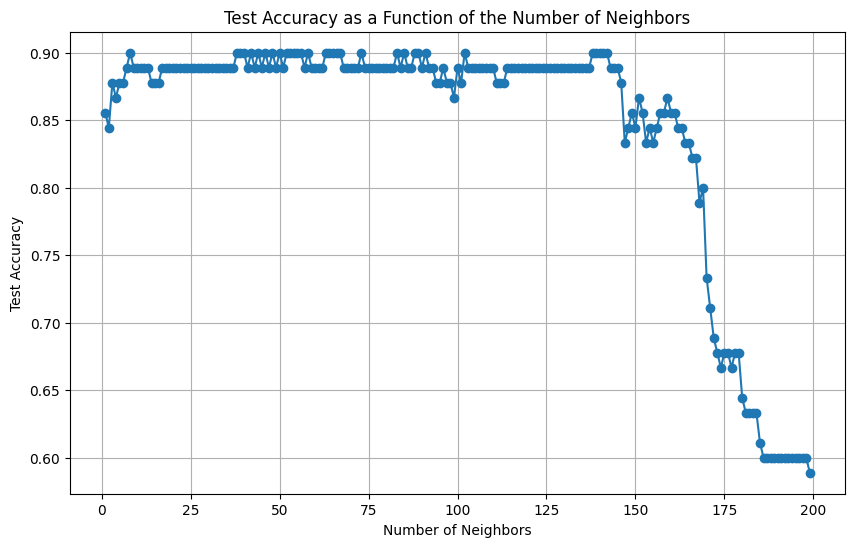

In [107]:
# Evaluate the test accuracy for different numbers of neighbors
neighbors = np.arange(1, 200)
test_accuracies = []

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    test_accuracies.append(accuracy_score(y_test, y_pred))

# Plot the test accuracy curve
plt.figure(figsize=(10, 6))
plt.plot(neighbors, test_accuracies, marker='o')
plt.title('Test Accuracy as a Function of the Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()

In [108]:
from matplotlib.animation import FuncAnimation

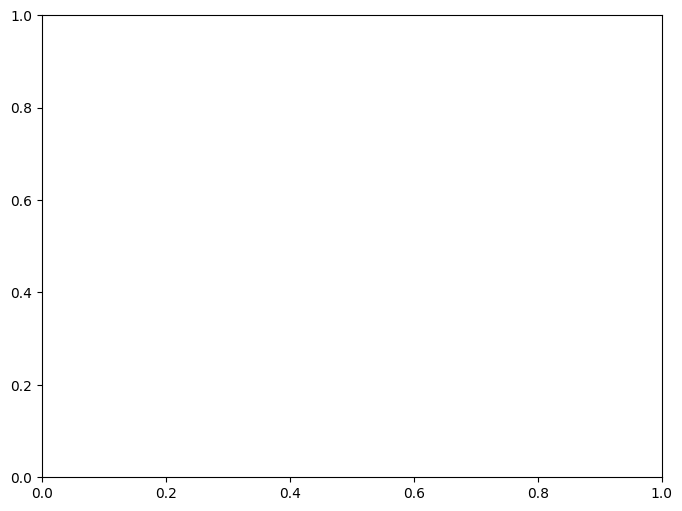

In [109]:
fig, ax = plt.subplots(figsize=(8, 6))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


In [110]:
def init():
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    return []

# Function to update the plot for each frame
def update(frame):
    ax.clear()
    knn = KNeighborsClassifier(n_neighbors=frame + 1)
    knn.fit(X_train, y_train)
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis', edgecolor='k')
    ax.set_title(f'KNN Decision Boundaries (k = {frame + 1})')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    return []

# Create the animation
ani = FuncAnimation(fig, update, frames=np.arange(1, 31), init_func=init, blit=True)

# Save the animation as a GIF
ani.save('knn_decision_boundaries.gif', writer='imagemagick', fps=2)

plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.
